# Assessing Performance

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# General performance - Overall

In [152]:
# loading the datasets
df_general = pd.read_excel("performance.xlsx", sheet_name='Python_Goals')
df_general.head()

,Matchday,Game,League,+2.5 Goals (%),Expected Goals,Decision,Odds O1.5,Odds O2.5,O1.5,O2.5,Final Decision
0,1,RasenBall Leipzig vs Eintracht Frankfurt,Bundesliga,0.75,0.0,O1.5,0.0,0.0,1,1,1
1,1,Werder Bremen vs Bochum,Bundesliga,0.84,0.0,O1.5,0.0,0.0,1,1,1
2,1,Bayern Munich vs Union Berlin,Bundesliga,0.85,0.0,O2.5,0.0,0.0,1,1,1
3,1,Mainz 05 vs Borussia M. Gladbach,Bundesliga,0.75,0.0,O1.5,0.0,0.0,1,1,1
4,1,Hertha Berlin vs Augsburg,Bundesliga,0.80,0.0,O1.5,0.0,0.0,1,0,1


In [153]:
# filtering datasets
df_70s = df_general[df_general['+2.5 Goals (%)'] >= 0.70].reset_index(drop=True)
df_80s = df_general[df_general['+2.5 Goals (%)'] >= 0.80].reset_index(drop=True)
df_85s = df_general[df_general['+2.5 Goals (%)'] >= 0.85].reset_index(drop=True)

In [154]:
# defining the function
def performance(df):
    variables = ['O1.5', 'O2.5', 'Final Decision']
    counter = 0 
    performance_dict = {}
    
    while counter < len(variables):
        a = df[variables[counter]].sum() / df[variables[counter]].count() 
        print(f' {variables[counter]} general performance (%): {round(a,2)}')
        counter += 1
        


In [155]:
def performance_(df):
    variables = ['O1.5', 'O2.5', 'Final Decision']
    counter = 0
    performance_dict = {v: {} for v in variables}
    
    while counter < len(variables):
        var = variables[counter]
        a = df[var].sum() / df[var].count()
        performance_dict[var]['Success'] = round(a, 2)
        performance_dict[var]['Fail'] = round(1 - a, 2)
        counter += 1
    
    # stacked bar chart
    plt.style.use('dark_background')
    plt.figure(figsize=(7,5))
    plt.bar(variables, [performance_dict[v]['Success'] for v in variables], label='Success', color = '#2EA1D4')
    plt.bar(variables, [performance_dict[v]['Fail'] for v in variables], bottom=[performance_dict[v]['Success'] for v in variables], color = '#E9D758', label='Fail')
    plt.xlabel('Bet Type', fontsize=13)
    plt.ylabel('Success Percentage', fontsize=13)
    plt.legend()
    plt.show()
    



 ---- Overall Model's Performance ---- 

 O1.5 general performance (%): 0.92
 O2.5 general performance (%): 0.69
 Final Decision general performance (%): 0.84


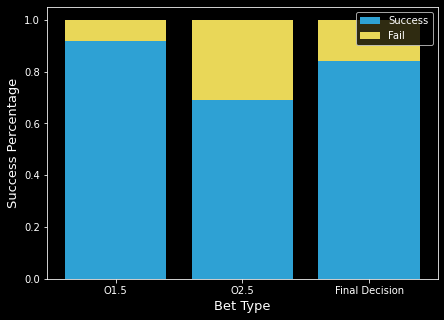


 ---- Model's Performance (>70%) ---- 

 O1.5 general performance (%): 0.91
 O2.5 general performance (%): 0.67
 Final Decision general performance (%): 0.83


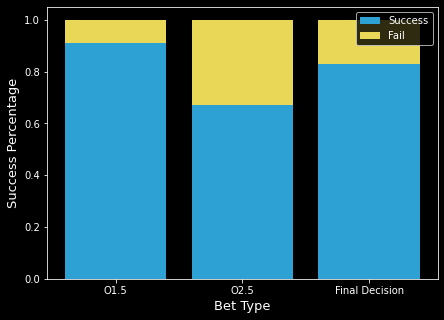


 ---- Model's Performance (>80%) ---- 

 O1.5 general performance (%): 0.97
 O2.5 general performance (%): 0.75
 Final Decision general performance (%): 0.81


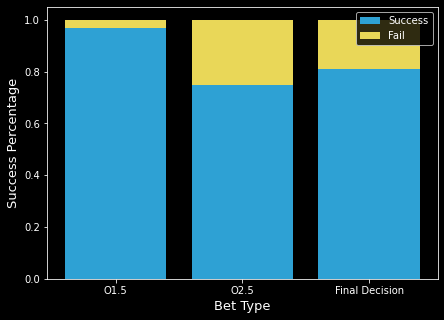


 ---- Model's Performance (>85%) ---- 

 O1.5 general performance (%): 0.98
 O2.5 general performance (%): 0.76
 Final Decision general performance (%): 0.76


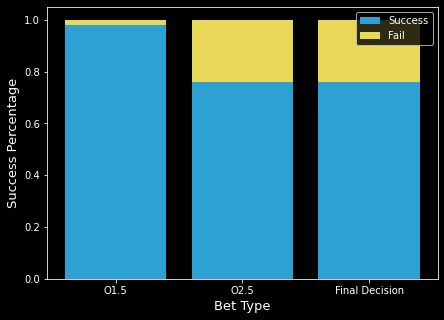

In [156]:
print("\n ---- Overall Model's Performance ---- \n")
performance(df_general)
performance_(df_general)

print("\n ---- Model's Performance (>70%) ---- \n")
performance(df_70s)
performance_(df_70s)

print("\n ---- Model's Performance (>80%) ---- \n")
performance(df_80s)
performance_(df_80s)

print("\n ---- Model's Performance (>85%) ---- \n")
performance(df_85s)
performance_(df_85s)

# General Performance - By League

In [157]:
league_counts = df_general['League'].value_counts()
total_records = league_counts.sum()
league_percentages = league_counts / total_records * 100
result = pd.concat([league_counts, league_percentages], axis=1, keys=['Count', 'Percentage'])
result

,Count,Percentage
Bundesliga,58,47.933884
Premier,22,18.181818
Serie A,11,9.090909
Ligue 1,10,8.264463
Eredivisie,9,7.438017
La Liga,8,6.611570
RFPL,3,2.479339


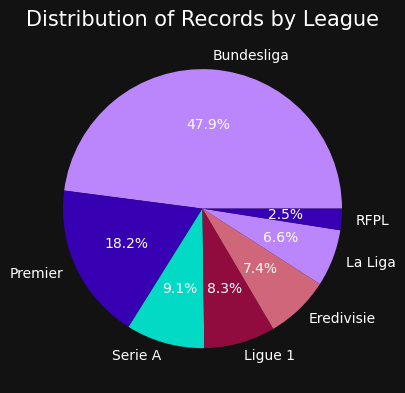

In [158]:
# create figure and axis objects
fig, ax = plt.subplots(figsize=(4.5 ,9.5), dpi = 100, facecolor = "#121212")

colors = ['#BB86FC', '#3700B3', '#03DAC6', '#900C3F', '#CF6679']
# plot the pie chart using the axis object
pie = ax.pie(result['Count'], labels=result.index, autopct='%1.1f%%', colors=colors)

# set the title and axis label
ax.set_title('Distribution of Records by League', color='white', size=15)

# setting the color of the label
for text in pie[1]:
    text.set_color('white')

# display the chart
plt.show()


 ---- Bundesliga Model's Performance ---- 

 O1.5 general performance (%): 0.93
 O2.5 general performance (%): 0.69
 Final Decision general performance (%): 0.83


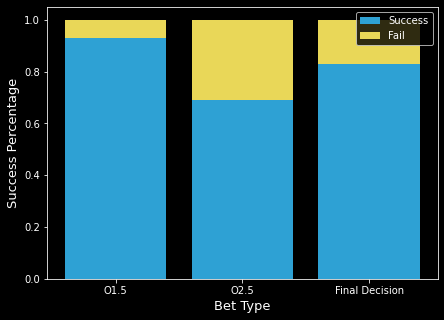


 ---- La Liga Model's Performance ---- 

 O1.5 general performance (%): 0.75
 O2.5 general performance (%): 0.5
 Final Decision general performance (%): 0.75


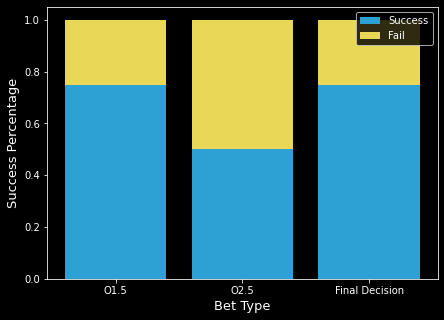


 ---- Serie A Model's Performance ---- 

 O1.5 general performance (%): 1.0
 O2.5 general performance (%): 0.45
 Final Decision general performance (%): 0.91


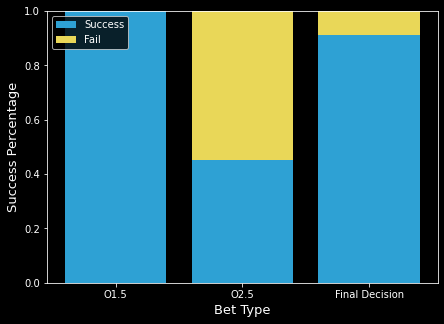


 ---- Premier Model's Performance ---- 

 O1.5 general performance (%): 0.91
 O2.5 general performance (%): 0.82
 Final Decision general performance (%): 0.86


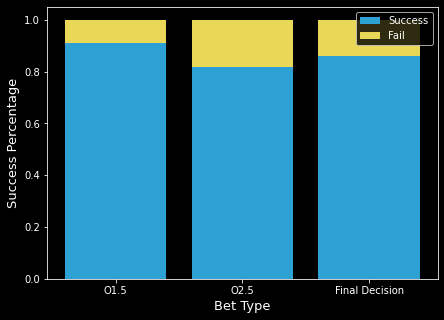


 ---- Ligue 1 Model's Performance ---- 

 O1.5 general performance (%): 1.0
 O2.5 general performance (%): 1.0
 Final Decision general performance (%): 1.0


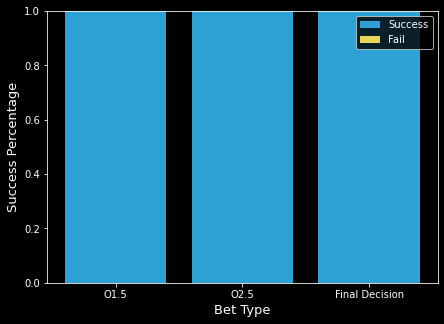


 ---- Eredivisie Model's Performance ---- 

 O1.5 general performance (%): 0.78
 O2.5 general performance (%): 0.56
 Final Decision general performance (%): 0.78


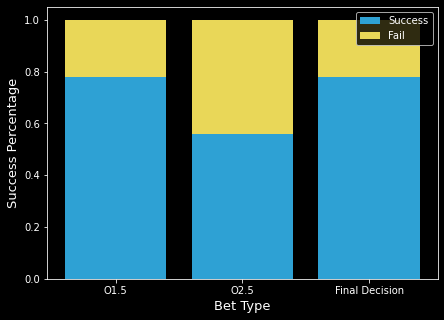


 ---- RFPL Model's Performance ---- 

 O1.5 general performance (%): 1.0
 O2.5 general performance (%): 0.33
 Final Decision general performance (%): 0.67


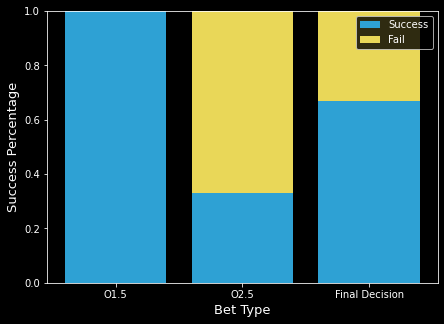

In [159]:
# filtering datasets
df_bundes = df_general[df_general['League'] == 'Bundesliga'].reset_index(drop=True)
df_laliga = df_general[df_general['League'] == 'La Liga'].reset_index(drop=True)
df_seriea = df_general[df_general['League'] == 'Serie A'].reset_index(drop=True)
df_premier = df_general[df_general['League'] == 'Premier'].reset_index(drop=True)
df_ligue1 = df_general[df_general['League'] == 'Ligue 1'].reset_index(drop=True)
df_eredivisie = df_general[df_general['League'] == 'Eredivisie'].reset_index(drop=True)
df_rfpl = df_general[df_general['League'] == 'RFPL'].reset_index(drop=True)


print("\n ---- Bundesliga Model's Performance ---- \n")
performance(df_bundes)
performance_(df_bundes)

print("\n ---- La Liga Model's Performance ---- \n")
performance(df_laliga)
performance_(df_laliga)

print("\n ---- Serie A Model's Performance ---- \n")
performance(df_seriea)
performance_(df_seriea)

print("\n ---- Premier Model's Performance ---- \n")
performance(df_premier)
performance_(df_premier)

print("\n ---- Ligue 1 Model's Performance ---- \n")
performance(df_ligue1)
performance_(df_ligue1)

print("\n ---- Eredivisie Model's Performance ---- \n")
performance(df_eredivisie)
performance_(df_eredivisie)

print("\n ---- RFPL Model's Performance ---- \n")
performance(df_rfpl)
performance_(df_rfpl)

# Analyst Reccomendations Performance

In [160]:
df_analyst = pd.read_excel("performance.xlsx", sheet_name='Analyst_Goals')
df_analyst.head()

,Matchday,Game,League,+2.5 Goals (%),Expected Goals,Decision,Result
0,1,RasenBall Leipzig vs Eintracht Frankfurt,Bundesliga,0.75,NaN,O1.5,1
1,1,Werder Bremen vs Bochum,Bundesliga,0.84,NaN,O1.5,1
2,1,Bayern Munich vs Union Berlin,Bundesliga,0.85,NaN,O2.5,1
3,2,FC Cologne vs Bochum,Bundesliga,0.92,6.20,O1.5,1
4,2,Bayern Munich vs Augsburg,Bundesliga,0.96,7.52,O2.5,1


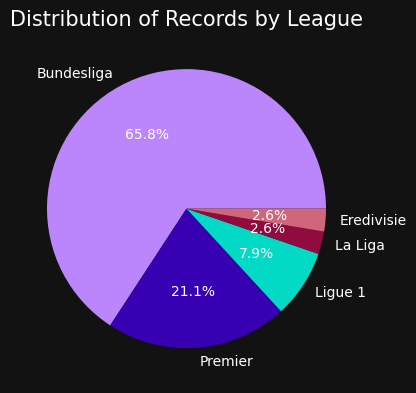

Analyst Recommendation Performance: 0.9473684210526315


In [161]:
league_counts = df_analyst['League'].value_counts()
total_records = league_counts.sum()
league_percentages = league_counts / total_records * 100
result = pd.concat([league_counts, league_percentages], axis=1, keys=['Count', 'Percentage'])
result

# create figure and axis objects
fig, ax = plt.subplots(figsize=(4.5 ,9.5), dpi = 100, facecolor = "#121212")

colors = ['#BB86FC', '#3700B3', '#03DAC6', '#900C3F', '#CF6679']
# plot the pie chart using the axis object
pie = ax.pie(result['Count'], labels=result.index, autopct='%1.1f%%', colors=colors)

# set the title and axis label
ax.set_title('Distribution of Records by League', color='white', size=15)

# setting the color of the label
for text in pie[1]:
    text.set_color('white')

# display the chart
plt.show()


a = df_analyst['Result'].sum() / df_analyst['Result'].count()
print(f'Analyst Recommendation Performance: {a}')

## Model Optimization & Kelly Formula performance